# Feature engineering

Le feature engineering, ou l'ingénierie des caractéristiques (personnellement, je préfère le terme en anglais) est le processus de création ou d'amélioration des variables explicatives. Il existe plusieurs techniques du feature engineering qui permettent d'améliorer les résultats de vos prédictions. Cependant, rien n'est garanti que les améliorations seront importantes.

## Variables catégorielles

On se rappelle dans la section ... que les variables catégorielles sont des propriétés qui peuvent décrire un produit, mais elles ne varient pas de manière continue.

### One-hot-encoding

La technique la plus commune de représenter les variables catégorielles est d'utiliser _One-hot-encoding_. Les valeurs 0 et 1 ont un sens dans la formule de classification linéaire binaire, et nous pouvons représenter un nombre quelconque de catégories en introduisant une nouvelle caractéristique par catégorie, comme décrits ici.

In [5]:
import pandas as pd
df_cat = pd.DataFrame({'Veleurs entières': [0, 1, 2, 1],
                        'Variable categorielle': ['Honda', 'Toyota', 'Tesla', 'BMW']
                       })
df_cat

Veleurs entières Variable categorielle
0                 0                 Honda
1                 1                Toyota
2                 2                 Tesla
3                 1                   BMW

In [6]:
pd.get_dummies(df_cat)

Veleurs entières  Variable categorielle_BMW  Variable categorielle_Honda  \
0                 0                          0                            1   
1                 1                          0                            0   
2                 2                          0                            0   
3                 1                          1                            0   

   Variable categorielle_Tesla  Variable categorielle_Toyota  
0                            0                             0  
1                            0                             1  
2                            1                             0  
3                            0                             0

### Dummy encoding

In [7]:
pd.get_dummies(df_cat,drop_first=True)

Veleurs entières  Variable categorielle_Honda  Variable categorielle_Tesla  \
0                 0                            1                            0   
1                 1                            0                            0   
2                 2                            0                            1   
3                 1                            0                            0   

   Variable categorielle_Toyota  
0                             0  
1                             1  
2                             0  
3                             0

Comme le one-hot encoding peut augmenter considérablement la dimensionnalité de nos données si l'on dispose d'un ensemble de données avec de nombreuses variables catégorielles et que ces variables catégorielles ont à leur tour de nombreux niveaux uniques. Dans ce cas, nous pouvons envisager un codage par étiquette (Label encoding) ou une autre solution.

### Label encoding

L'encodage par étiquettes est une conversion numérique des niveaux d'une variable catégorielle. Si une variable catégorielle est un facteur et qu'elle a des niveaux prédéfinis, la conversion numérique se fera dans l'ordre des niveaux. Si aucun niveau n'est spécifié, l'encodage se fera par ordre alphabétique. Par exemple, la variable MS_SubClass a 16 niveaux, que nous pouvons recoder numériquement avec step_integer().

In [8]:
df_cat

Veleurs entières Variable categorielle
0                 0                 Honda
1                 1                Toyota
2                 2                 Tesla
3                 1                   BMW

In [9]:
df_cat["VariableCatLabel"] = df_cat["Variable categorielle"].astype('category')
df_cat.dtypes

Veleurs entières            int64
Variable categorielle      object
VariableCatLabel         category
dtype: object

In [11]:
df_cat["VariableCatLabelLable"] = df_cat["VariableCatLabel"].cat.codes
df_cat

Veleurs entières Variable categorielle VariableCatLabel  \
0                 0                 Honda            Honda   
1                 1                Toyota           Toyota   
2                 2                 Tesla            Tesla   
3                 1                   BMW              BMW   

   VariableCatLabelLable  
0                      1  
1                      3  
2                      2  
3                      0

### Découpage

Parfois, certaines variables contiennent des niveaux qui ne font l'objet que de très peu d'observations. Par exemple, dans une base de données d'assurance, dans la variable marques de voiture, vous trouverez que quelques observations avec "Ferrari", "Lamborghini" .... Dans ce cas, on peut probablement regrouper ces marques sous une seule catégorie qui sera alors "voiture sport de luxe" 

### Autres techniques

Il existe une panoplie d'autres techniques d'encodage  de variables catégorielles. Je ne les pas toutes utilisés, mais je vous réfère à {cite}`scikit_encode` pour avoir plus d'informations.

## Variables quantitatives

Lorsque leurs distributions des variables quantitatives sont faussées ou contiennent des valeurs aberrantes, cela peut créer des problèmes pour certains modèles d'apprentissage machine. Par exemple, les GLM, KNN, SVM ou même les réseaux de neurones peuvent être fortement entravés par ces problèmes. La normalisation et la standardisation de variables fortement biaisées peuvent contribuer à minimiser ces problèmes.

Les valeurs des différentes caractéristiques peuvent différer par ordre de grandeur. Parfois, cela peut signifier que les grandes valeurs dominent les petites. Tout dépend de l’algorithme que nous utilisons, certains algorithmes nécessitent une mise à l'échelle des données pour qu'ils fonctionnent correctement.

Les modèles paramétriques qui ont des hypothèses de distribution (par exemple, les GLM et les modèles régularisés) peuvent bénéficier de la minimisation de l'asymétrie des variables numériques. 

Les modèles non paramétriques sont rarement affectés par des caractéristiques biaisées ; cependant, la normalisation des caractéristiques n'aura pas d'effet négatif sur les performances de ces modèles. 

Voici quelques stratégies communes que nous pouvons appliquer :
- La normalisation supprime la moyenne d'une caractéristique et la divise par l'écart type. Si les valeurs des caractéristiques sont normalement distribuées, on obtient un gaussien, qui est centré autour de $0$ avec une variance de $1$.
- Si les valeurs des caractéristiques ne sont pas normalement distribuées, nous pouvons supprimer la médiane et la diviser par l'intervalle interquartile. L'écart interquartile est l'intervalle entre le premier et le troisième quartile (ou 25e et 75e percentile).
- La mise à l'échelle des caractéristiques en fonction d'un intervalle est un choix courant d'intervalle entre zéro et un.

### Transformation polynomiale

Si nous avons deux caractéristiques, $a$ et $b$, nous pouvons penser à l'existence d'une relation polynomiale, telle que $a^{2}+a b+b^{2}$. Nous pouvons considérer chaque terme de la somme comme une caractéristique - dans l'exemple précédent, nous avons trois caractéristiques, qui sont $a$, $b$ et $a^{2}+a b+b^{2}$. Le produit $ab$ au milieu est appelé une interaction. Une interaction ne doit pas nécessairement être un produit - bien que ce soit le choix le plus courant - elle peut aussi être une somme, une différence ou un rapport. Si nous utilisons un ratio pour éviter de diviser par zéro, nous devons ajouter une petite constante au diviseur et au dividende.

### Transformateurs de puissance

Les transformateurs de puissance sont des fonctions que nous pouvons utiliser pour transformer des caractéristiques numériques afin de mieux se conformer à une distribution normale. Une transformation très courante pour les valeurs qui varient par ordre de grandeur est de prendre le logarithme.

Le fait de prendre le logarithme d'une valeur nulle et de valeurs négatives n'est pas défini, nous pouvons donc avoir besoin d'ajouter une constante à toutes les valeurs de la caractéristique correspondante avant de prendre le logarithme. Nous pouvons également prendre la racine carrée pour les valeurs positives, mettre les valeurs au carré, ou calculer toute autre puissance que nous souhaitons.

#### Box-Cox

Une autre transformation de puissance utile est la transformation Box-Cox, du nom de ses créateurs, deux statisticiens appelés George Box et Sir David Roxbee Cox. La transformation Box-Cox (lorsque les valeurs des variables sont strictement positives) tente de trouver la meilleure puissance nécessaire pour transformer les données originales en données plus proches de la distribution normale. Au cas où vous seriez intéressé, la transformation est définie comme suit :

$$y_{i}^{(\lambda)}=\left\{\begin{array}{ll}\frac{y_{i}^{\lambda}-1}{\lambda} & \text { if } \lambda \neq 0 \\ 1 n\left(y_{i}\right) & \text { if } \lambda=0\end{array}\right.$$

Autrement dit, nous essayons de transformer les variables dépendantes non normales de nos données en une forme normale grâce à laquelle nous pouvons effectuer plus de tests que nous aurions pu le faire. Pour ce faire, nous utilisons la transformation Box-cox ne s'intéresse qu'au calcul de la valeur de $\lambda$ qui varie de $- 5$ à $5$. On dit qu'une valeur de $\lambda$ est meilleure si elle est capable de rapprocher la courbe non normale d'une courbe normale.

In [12]:
import numpy as np 
from scipy import stats 
import seaborn as sns 
import matplotlib.pyplot as plt 
  
original_data = np.random.exponential(size = 1000) 

fitted_data, fitted_lambda = stats.boxcox(original_data) 

In [18]:
list(fitted_data)[0:10]

[-0.8908447857401863,
 2.0530931421185366,
 -2.1408150479463446,
 -0.125825767853128,
 -0.21250443433878377,
 0.5850360330055975,
 1.4583513202588183,
 -1.3243743438074407,
 -0.26264821595508303,
 0.4893964215903129]

In [20]:
fitted_lambda

0.27393780811835394

La valeur de $\lambda$: 0.27393780811835394


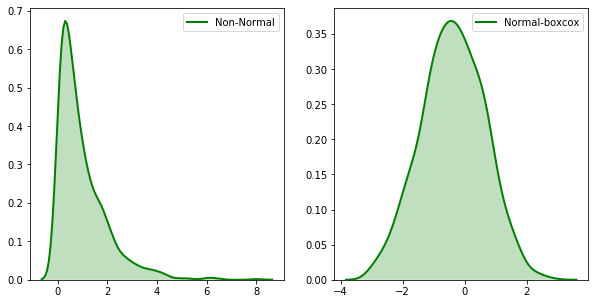

In [35]:
fig, ax = plt.subplots(1, 2) 
sns.distplot(original_data, hist = False, kde = True, 
            kde_kws = {'shade': True, 'linewidth': 2},  
            label = "Non-Normal", color ="green", ax = ax[0]) 
  
sns.distplot(fitted_data, hist = False, kde = True, 
            kde_kws = {'shade': True, 'linewidth': 2},  
            label = "Normal-boxcox", color ="green", ax = ax[1])  
plt.legend(loc = "upper right") 

fig.set_figheight(5) 
fig.set_figwidth(10) 
  
print(f"La valeur de $\lambda$: {fitted_lambda}") 

#### Yeo-Johnson
lorsque les valeurs des variables **ne** sont **pas** strictement positives on peut utiliser la transformation de Yeo-Johnson. Elle permet d'obtenir des valeurs nulles et négatives de $y$. $\lambda$ peut être n'importe quel nombre réel. La loi de transformation est la suivante :

$y_{i}^{(\lambda)}=\left\{\begin{array}{ll}\left(\left(y_{i}+1\right)^{\lambda}-1\right) / \lambda & \text { if } \lambda \neq 0, y \geq 0 \\ \log \left(y_{i}+1\right) & \text { if } \lambda=0, y \geq 0 \\ -\left[\left(-y_{i}+1\right)^{(2-\lambda)}-1\right] /(2-\lambda) & \text { if } \lambda \neq 2, y<0 \\ -\log \left(-y_{i}+1\right) & \text { if } \lambda=2, y<0\end{array}\right.$

In [25]:
fitted_data_yj, fitted_lambda_yj = stats.yeojohnson(original_data) 

In [26]:
list(fitted_data_yj)[0:10]

[0.272659119008404,
 0.9556251124090047,
 0.03844796668236205,
 0.49554557777018826,
 0.47007108229588335,
 0.6886560887853846,
 0.8685863377209705,
 0.1645674928618513,
 0.4552468893495118,
 0.6648583056069839]

La valeur de $\lambda$: -0.8001793088236612


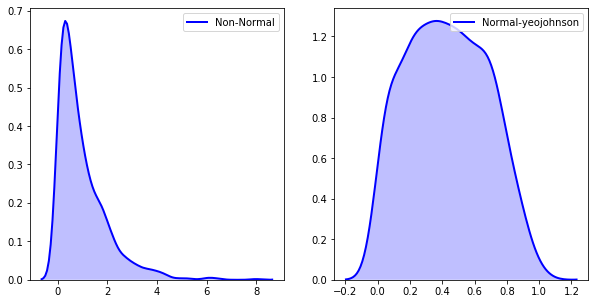

In [30]:

fig, ax = plt.subplots(1, 2)  
sns.distplot(original_data, hist = False, kde = True, 
            kde_kws = {'shade': True, 'linewidth': 2},  
            label = "Non-Normal", color ="blue", ax = ax[0]) 
  
sns.distplot(fitted_data_yj, hist = False, kde = True, 
            kde_kws = {'shade': True, 'linewidth': 2},  
            label = "Normal-yeojohnson", color ="blue", ax = ax[1]) 
  
plt.legend(loc = "upper right") 

fig.set_figheight(5) 
fig.set_figwidth(10) 
  
print(f"La valeur de $\lambda$: {fitted_lambda_yj}") 

```{bibliography} ../references_data.bib
:filter: docname in docnames
```